<a href="https://colab.research.google.com/github/suhyeon03/study_ML_kaggle/blob/main/kaggle_evaluation_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"parksuh","key":"d334f0ba44dadedc034c03fd3ed8adcf"}'}

In [62]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json


In [63]:

! kaggle competitions download -c titanic


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:

!unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#1.정확도(Accuracy)
## 정확도, 오차행렬, 정밀도, 재현율, F1스코어, ROC AUC

In [65]:
# 분류는 결정 클래스 값 종류의 유행에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진분류와
# 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있다.
# 정확도는 직관적으로 모델 예측 성능을 나타내는 평가지표다.
# 하지만 이진분류의 경우 데이터 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

In [66]:
# 남아있는 문자열 카테고리를 피처를 숫자형 카테고리 피처로 변환한다.
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  return df


# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df


# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df




In [67]:
from sklearn.base import BaseEstimator
# 아무런 학습을 하지않고 성별에 따라 생존자를 예측하는 단순한 classifier를 생성한다.

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지않는다.
  def fit(self, X, y=None):
    pass
  # predict() 메서드는 아무것도 학습하지 않음
  def predict(self, X):
    import numpy as np
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

In [68]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에 생성한 Dummy Cassifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))


Dummy Classifier의 정확도는: 0.7877


<ipython-input-66-a6eb8d403ec6>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-66-a6eb8d403ec6>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [69]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()을 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [70]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [71]:
# 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안된다.

#2.오차 행렬

In [72]:
# TN은 예측값을 Negative 값을 0으로 예측했고 실제 값 역시 Negative 값 0
# FP는 예측값을 Positive 값을 1으로 예측했는데 실제 값은 Negative 값 0
# FN은 예측값을 Negative 값을 0으로 예측했고 실제 값은 Positive 값 1
# TP는 예측값을 Positive 값을 1으로 예측했는데 실제 값 역시 Positive 값 1

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)
# 방금전 모델은 무조건 Negative로 예측하는 Classifier였고 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건 이였다.
# 이 값을 조합해 정확도, 정밀도, 재현율 값을 알 수 있다.
# 정확도는 예측값과 실제값이 얼마나 동일한가에 대한 비율만으로 결정된다.
# 따라서 오차행렬에서 True에 해당하는 값인 TN, TP에 좌우된다.
# 불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기때문에
# 데이터에 기반한 ML알고리즘은 Positive보다는 Negative로 예측정확도가 높아지는 경향이 발생한다.
# 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도
# 분류 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 된다.

array([[405,   0],
       [ 45,   0]])

#3.정밀도와 재현율

In [74]:
# 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. FP + TP는 예측을 Positive로 한 모든 데이터 건수다.
# Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다.

In [75]:
# 재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. FN + TP는 실제 값이 Positive인 모든 데이터 건수다.
# 민감도 또는 TPR이라고도 부른다.

In [76]:
# 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
# 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
# 모두 TP를 높히는데 초점을 맞추지만 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춘다.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[93 17]
 [20 49]]
정확도: 0.7933, 정밀도: 0.7424, 재현율: 0.7101


<ipython-input-66-a6eb8d403ec6>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-66-a6eb8d403ec6>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

##3-1.정밀도/재현율 트레이드오프
### PR곡선




In [79]:
# 정밀도와 재현율은 상호보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.
# 이를 정밀도/재현율 트레이드오프(Trade-off)라고 부른다.
# 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다.
# 그리고 예측 확률이 큰 레이블값으로 예측하게 된다.

In [80]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.85157347 0.14842653]
 [0.87164664 0.12835336]
 [0.9239038  0.0760962 ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85157347 0.14842653 0.        ]
 [0.87164664 0.12835336 0.        ]
 [0.9239038  0.0760962  0.        ]]


In [81]:
# 사실 predict() 메서드는 predict_proba() 메서드에 기반에 생성된 api다.
# predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 (첫 번째 칼럼 또는 두 번쨰 칼럼)위치를 받아서
# 최종적으로 예측 클래스를 결정하는 api다.

In [82]:
# 직접 트레이트오프 방식을 이해해보자.
# Binarizer 객체의 fit_transform() 메서드를 이용해 ndarray의 값을 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환한다.

In [83]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],
     [2,0,0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [84]:
# 이제 Binarize을 이용해 사이킷런 predict()의 의사(qseudo)코드를 만들어 보자.
# 각 클래스별 예측 확률 값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식이다.

In [85]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pre_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pre_proba_1)
custom_predict = binarizer.transform(pre_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[93 17]
 [20 49]]
정확도: 0.7933, 정밀도: 0.7424, 재현율: 0.7101


In [86]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pre_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pre_proba_1)
custom_predict = binarizer.transform(pre_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[87 23]
 [14 55]]
정확도: 0.7933, 정밀도: 0.7051, 재현율: 0.7971


In [87]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[87 23]
 [14 55]]
정확도: 0.7933, 정밀도: 0.7051, 재현율: 0.7971
임곗값: 0.45
오차행렬
[[91 19]
 [18 51]]
정확도: 0.7933, 정밀도: 0.7286, 재현율: 0.7391
임곗값: 0.5
오차행렬
[[93 17]
 [20 49]]
정확도: 0.7933, 정밀도: 0.7424, 재현율: 0.7101
임곗값: 0.55
오차행렬
[[98 12]
 [23 46]]
정확도: 0.8045, 정밀도: 0.7931, 재현율: 0.6667
임곗값: 0.6
오차행렬
[[101   9]
 [ 26  43]]
정확도: 0.8045, 정밀도: 0.8269, 재현율: 0.6232


In [88]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도: ', np.round(precisions[thr_index],3))
print('샘플 임곗값별 재현율: ', np.round(recalls[thr_index],3))


반환된 분류 결정 임곗값 배열의 Shape: (172,)
샘플 추출을 위한 임곗값 배열의 index: [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값: [0.04 0.11 0.13 0.15 0.18 0.24 0.36 0.47 0.61 0.71 0.84 0.93]
샘플 임곗값별 정밀도:  [0.385 0.409 0.455 0.504 0.562 0.629 0.707 0.731 0.827 0.919 1.    1.   ]
샘플 임곗값별 재현율:  [1.    0.971 0.957 0.942 0.913 0.884 0.841 0.71  0.623 0.493 0.319 0.101]


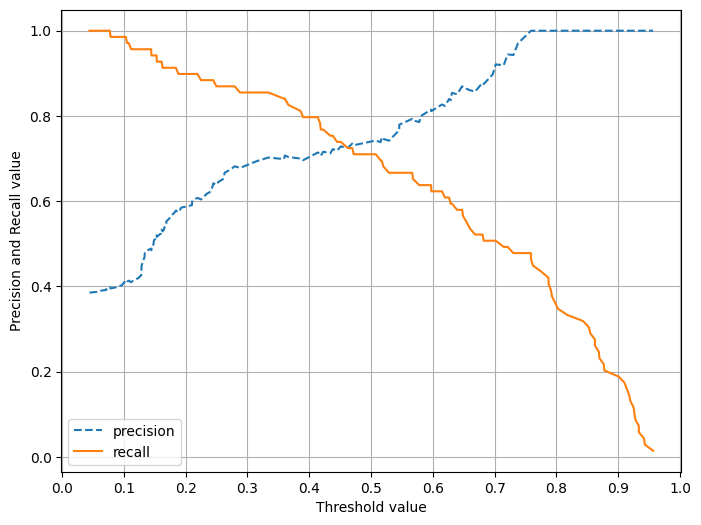

In [89]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  thresholds_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])







##3-2.정밀도와 재현율의 맹점


In [90]:
# positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다.
# 정밀도 100%가 되는 방법 - 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다. , FP = 0
# 재현율 100%가 되는 방법 - 모든 환자를 Positive로 예측한다. , FN = 0
# 결국은 상호보완적으로 이용해야한다.

#4.F1 스코어


In [91]:
# F1스코어는 정밀도와 재현율을 결합한 지표다.
# F1스코어는 정밀도와 재현율이 어느한쪽으로 치우치지않느 수치를 나타날때 상대적으로 높은 값을 가진다.

In [92]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7259


In [93]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[87 23]
 [14 55]]
정확도: 0.7933, 정밀도: 0.7051, 재현율: 0.7971, F1:0.7483
임곗값: 0.45
오차행렬
[[91 19]
 [18 51]]
정확도: 0.7933, 정밀도: 0.7286, 재현율: 0.7391, F1:0.7338
임곗값: 0.5
오차행렬
[[93 17]
 [20 49]]
정확도: 0.7933, 정밀도: 0.7424, 재현율: 0.7101, F1:0.7259
임곗값: 0.55
오차행렬
[[98 12]
 [23 46]]
정확도: 0.8045, 정밀도: 0.7931, 재현율: 0.6667, F1:0.7244
임곗값: 0.6
오차행렬
[[101   9]
 [ 26  43]]
정확도: 0.8045, 정밀도: 0.8269, 재현율: 0.6232, F1:0.7107


##5.ROC 곡선과 AUC

In [94]:
# ROC곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표다.
# ROC곡선은 우리말로 수신자 판단 곡선으로 불린다.
# FPR이 변할때 TPR이 어떻게 변하는지를 나타내는 곡선이다.
# FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.

In [95]:
# 민감도(TPR) - 재현율이다. 실제값 Positive(양성)가 정확히 예측되야 하는 수준을 나타낸다.(질병이 있는 사람은 질병이 있는 것으로 양성 판정)
# 특이성(TNR) - 실제값 Negative(음성)가 정확히 예측되야하는 수준을 나타낸다.(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

In [96]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플 index로 추출한 임곗값: [0.96 0.7  0.64 0.61 0.53 0.47 0.43 0.36 0.25 0.18 0.16 0.13 0.11 0.04]
샘플 임곗값별 FPR:  [0.    0.027 0.064 0.082 0.145 0.164 0.191 0.218 0.309 0.418 0.527 0.682
 0.864 1.   ]
샘플 임곗값별 TPR:  [0.014 0.507 0.58  0.623 0.667 0.725 0.754 0.841 0.87  0.913 0.928 0.957
 0.971 1.   ]


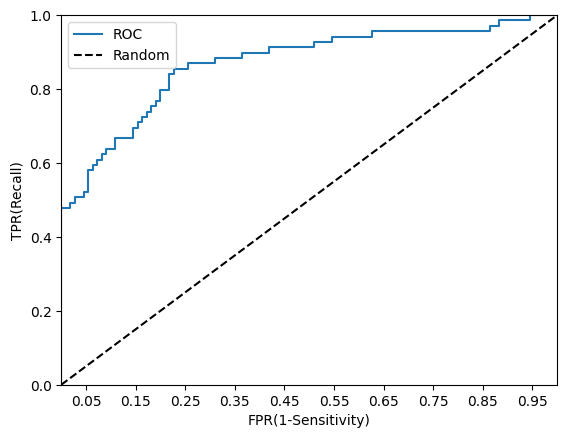

In [97]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 드래프 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1], [0,1], 'k--', label='Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [98]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8697


In [99]:
def get_clf_eval_rocauc(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-ACU print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [100]:
# ROC AUC 곡선은 데이터의 불균형이 심할땐 믿기 어려움
# PR 곡선이 더 좋을 수도 // 사실 모르겠음 평가지표

##6.피마 인디언 당뇨병 예측


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [102]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [105]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)
# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred)

오차행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1:0.6465


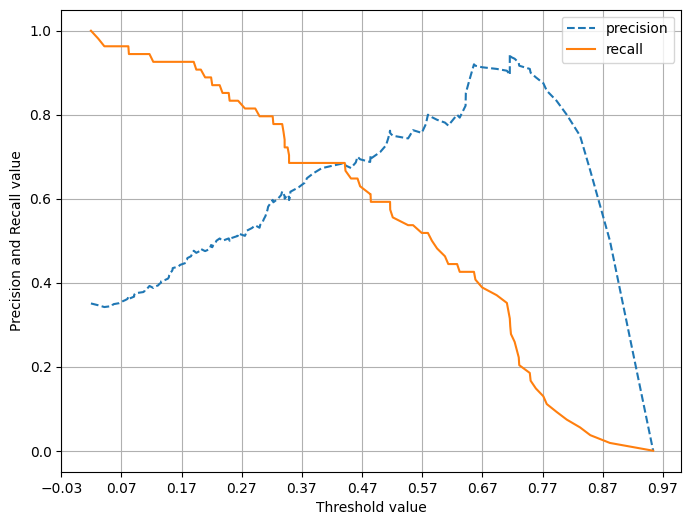

In [106]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [107]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


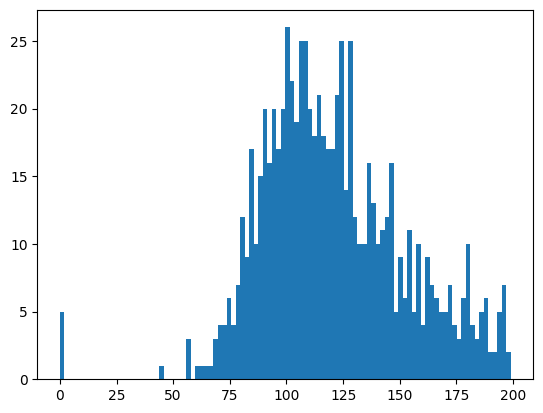

In [108]:
plt.hist(diabetes_data['Glucose'],bins=100)
plt.show()

In [ ]:
# 포도당 값이 최소인 것이 0이 너무 많다.
# 0 값의 건수 및 전체 데이터 건수 대비 및 퍼센트의 비율로 존재하는지 확인해보자.

In [109]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [116]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [117]:
# 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다.
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScale 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_trian, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)
# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred)

오차행렬
[[99  1]
 [54  0]]
정확도: 0.6429, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [118]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차행렬
[[98  2]
 [54  0]]
정확도: 0.6364, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.33
오차행렬
[[98  2]
 [54  0]]
정확도: 0.6364, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.36
오차행렬
[[98  2]
 [54  0]]
정확도: 0.6364, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.39
오차행렬
[[98  2]
 [54  0]]
정확도: 0.6364, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.42
오차행렬
[[98  2]
 [54  0]]
정확도: 0.6364, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.45
오차행렬
[[99  1]
 [54  0]]
정확도: 0.6429, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.48
오차행렬
[[99  1]
 [54  0]]
정확도: 0.6429, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.5
오차행렬
[[99  1]
 [54  0]]
정확도: 0.6429, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)
# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048)

# 예제를 보고 따라하지만 먼가 이상하다 알아봐야될 거 같음


오차행렬
[[99  1]
 [54  0]]
정확도: 0.6429, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
